Esta base de dados é de um ecommerce indiano, BigBasket, o maior supermercado online da Índia. Lançado por volta de 2011 e, desde então, segue expandindo seus negócios.


In [2]:

%pip install --upgrade pip
%pip install matplotlib.pyplot
%pip install matplotlib
%pip install seaborn
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':[6, 6]}, font_scale = 1.2)

Importando o dataframe BigBasket Entire Product List
Possui 10 atributos:

index  
product - Título do produto
category - Categoria em que o produto está classificado
sub_category - Subcategoria do produto
brand - Marca do produto
sale_price - Preço em que o produto está sendo vendido no site
market_price - preço de mercado do produto
type - Tipo de produto
rating - Classificação do produto de acordo com clientes
description - Descrição detalhada do produto

In [5]:
df = pd.read_csv('/Users/vivianmedina/Downloads/BigBasket Products.csv')
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [6]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


(27555, 10)

Quais os produtos mais vendidos?
E os menos vendidos?

In [7]:
#10 produtos mais vendidos
top10mais = df['product'].value_counts().head(10)
top10mais


Turmeric Powder/Arisina Pudi          26
Extra Virgin Olive Oil                15
Cow Ghee/Tuppa                        14
Soft Drink                            12
Colorsilk Hair Colour With Keratin    12
Olive Oil - Extra Virgin              12
Coriander Powder                      11
Powder - Coriander                    11
Ghee/Tuppa                            11
Peanut Butter - Creamy                10
Name: product, dtype: int64

In [8]:
#10 produtos menos vendidos
top10menos=df['product'].value_counts().tail(10)
top10menos

50-50 Maska Chaska                                               1
Opalware Classique Serving Bowl - Medium, Royal Irish            1
Powder - Pepper                                                  1
Mixture - Bajra Puffs Masala                                     1
Sauteed Onion & Garlic Pasta Sauce                               1
Pepper & Herb Salami Chicken                                     1
Nutmeg Powder                                                    1
Disney Mickey Mouse Plastic Kids Sipper Bottle - Coolest Dude    1
Chocolates-Roasted Peanut Chocolate                              1
Green Tea - Pure Original                                        1
Name: product, dtype: int64

Nota-se que os indianos tendem a comprar diferentes tipos de óleos e ghee; produtos para cabelos, shampoos e óleos também estão nos produtos mais vendidos. Também vemos temperos específicos como açafrão em pó e coentro.



#Quais são as top 10 marcas mais vendidas?

In [9]:
top_10_brand = pd.DataFrame(df[['brand']].value_counts().head(10)).reset_index()
top_10_brand.columns = ['brand', 'count']
top_10_brand

,brand,count
0,Fresho,638
1,bb Royal,539
2,BB Home,428
3,DP,250
4,Fresho Signature,171
5,bb Combo,168
6,Amul,153
7,INATUR,146
8,Himalaya,141
9,Dabur,138


In [10]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

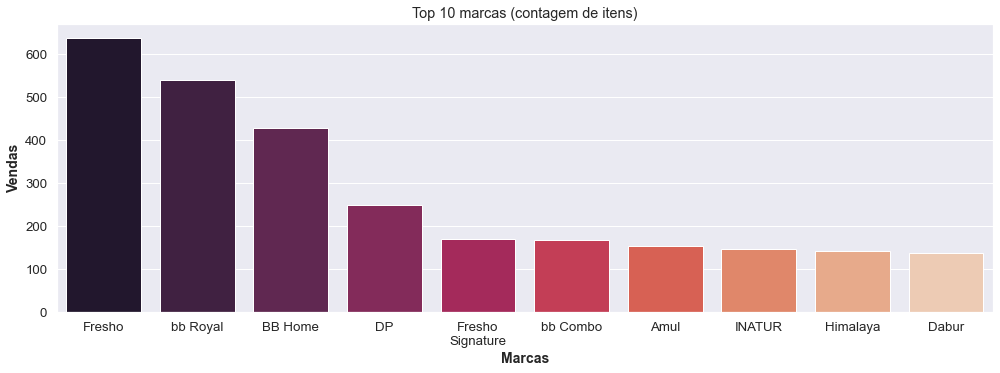

In [108]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_axes([0,0,1,1])
sns.barplot(data = top_10_brand, x = 'brand', y = 'count', palette='rocket')
plt.title('Top 10 marcas (contagem de itens)')
ax.set_xlabel("Marcas",fontsize=14, weight='semibold')
ax.set_ylabel("Vendas",fontsize=14, weight='semibold')
wrap_labels(ax, 10)

A marca mais com mais itens vendidos no ecommerce, como podemos ver na análise acima, é a Fresho. Podemos verificar a seguir qual é a categoria predominante nesta marca.

In [12]:
fresho = df[df['brand']=='Fresho']
fresho.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
115,116,Sapota - Organically Grown,Fruits & Vegetables,Fresh Fruits,Fresho,35.00,43.75,Organic Fruits,NaN,Brown skinned sapotas are smooth to grainy tex...
122,123,Cabbage - Red,Fruits & Vegetables,Fresh Vegetables,Fresho,23.00,28.75,Cabbage & Cauliflower,NaN,"It is round, wrapped in purplish red leaf laye..."
131,132,Banana - Red,Fruits & Vegetables,Fresh Fruits,Fresho,39.00,48.75,"Banana, Sapota & Papaya",NaN,Standing apart from the common varieties of ye...
132,133,"Chilli - Bajji, Mild",Fruits & Vegetables,Herbs & Seasonings,Fresho,14.00,17.50,"Lemon, Ginger & Garlic",NaN,Fresho is our brand of fresh fruits and vegeta...
180,181,Coriander Leaves 100 g + Garlic 250 g + Ginger...,Fruits & Vegetables,Herbs & Seasonings,Fresho,81.06,109.38,Indian & Exotic Herbs,NaN,"Coriander leaves are green, fragile with a dec..."


In [13]:
#categorias presentes na marca com mais produtos vendidos
fr = fresho.groupby('category'). count()['product']
fr

category
Bakery, Cakes & Dairy        19
Eggs, Meat & Fish            71
Foodgrains, Oil & Masala      1
Fruits & Vegetables         544
Snacks & Branded Foods        3
Name: product, dtype: int64

In [48]:
#categorias no geral
df['category'].value_counts().head(10)

Beauty & Hygiene            7867
Gourmet & World Food        4690
Kitchen, Garden & Pets      3580
Snacks & Branded Foods      2814
Foodgrains, Oil & Masala    2676
Cleaning & Household        2675
Beverages                    885
Bakery, Cakes & Dairy        851
Baby Care                    610
Fruits & Vegetables          557
Name: category, dtype: int64

In [15]:
#venda cat fruits & vegetables na fresho/ venda geral categoria fruits & vegetables
544/557

0.9766606822262118

A marca que vende mais, a Fresho, possui participação de 97% na venda dos itens da categoria de Fruits & Vegetables.  Porém ao analisar a base completa, nota-se que a categoria mais vendida é a de Beauty & Hygiene, seguida por Gourmet & World Food. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


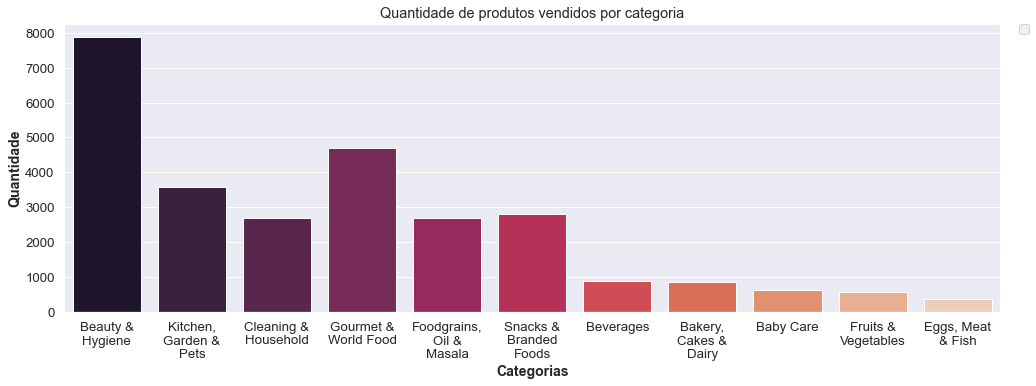

In [52]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'category', palette='rocket')
plt.title('Quantidade de produtos vendidos por categoria')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("Categorias",fontsize=14, weight='semibold')
ax.set_ylabel("Quantidade",fontsize=14, weight='semibold')
wrap_labels(ax, 10)


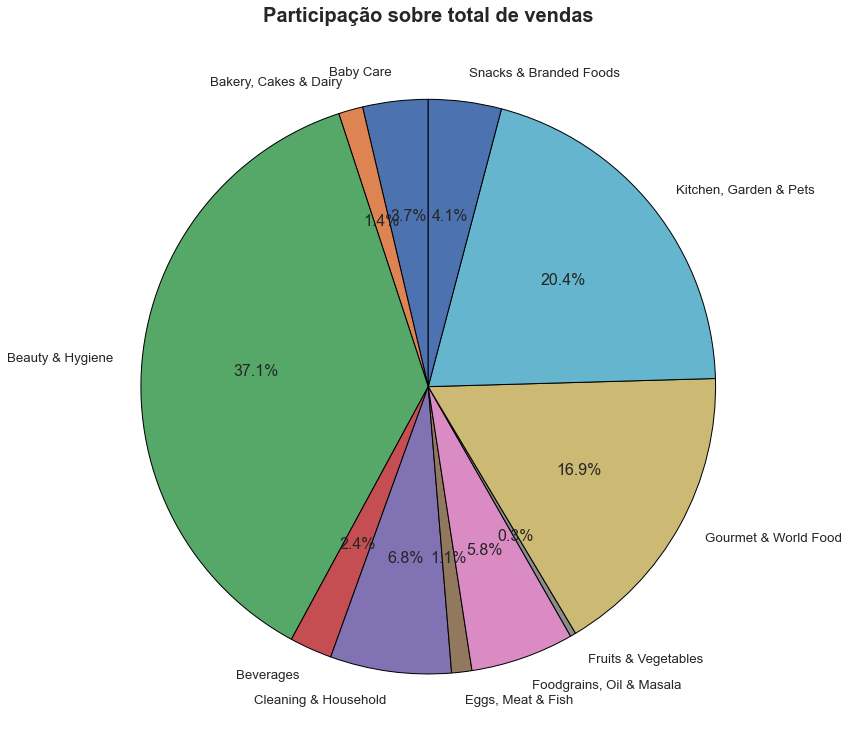

In [101]:
data = df.sale_price.groupby(df.category).sum()
plt.figure(figsize=(12,12))
plt.pie(x=data,labels=data.index,startangle=90,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Participação sobre total de vendas',fontweight="bold",fontdict={'fontsize': 20})
plt.rcParams['font.size'] = 16
plt.tight_layout()

37% do total da receita é representado pela categoria de Beauty & Hygiene, 20,4% por 

Quando verificamos o fatuaramento por categoria, obtemos o seguinte resultado:

In [102]:
data = pd.DataFrame(df.groupby('category')['sale_price'].sum()).reset_index().sort_values('sale_price', ascending = False)
data.columns = ['category', 'sales value']
data

,category,sales value
2,Beauty & Hygiene,3293749.24
9,"Kitchen, Garden & Pets",1816938.12
8,Gourmet & World Food,1500115.31
4,Cleaning & Household,605013.09
6,"Foodgrains, Oil & Masala",516916.23
10,Snacks & Branded Foods,364675.08
0,Baby Care,326317.17
3,Beverages,212186.67
1,"Bakery, Cakes & Dairy",121525.14
5,"Eggs, Meat & Fish",101114.12


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


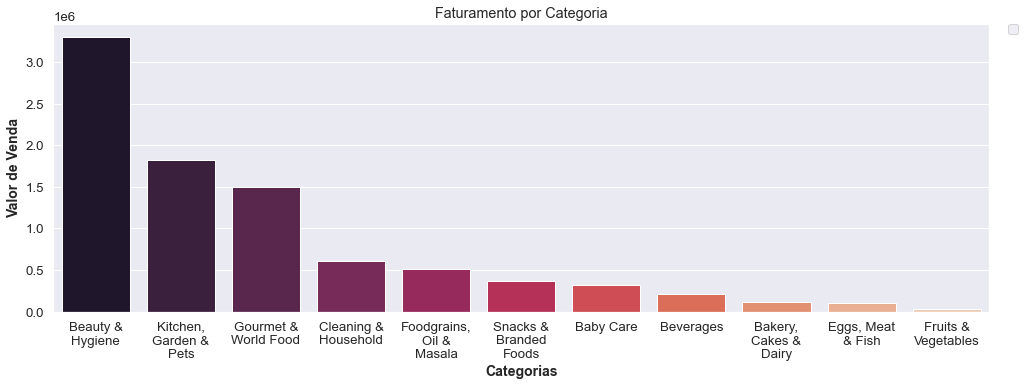

In [105]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_axes([0,0,1,1])
sns.barplot(data = data, x = 'category', y = 'sales value', palette='rocket')
plt.title('Faturamento por Categoria')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("Categorias",fontsize=14, weight='semibold')
ax.set_ylabel("Valor de Venda",fontsize=14, weight='semibold')
wrap_labels(ax, 10)

Beauty & Hygiene entrega o maior faturamento, porém Kitchen, Garden & Pets assume a segunda posição neste quesito, diferente da venda em quantidade de itens, em que fica em terceiro lugar na relação de categorias.

Quando analisamos por produto, Extra Virgin Olive Oil aparece liderando, seguido de Olive Oil - Extra Virgin e Olive Pomace Oil. Ainda nos Top 10 temos mais oleos compondo a relação.

In [106]:
prod_profit = pd.DataFrame(df.groupby('product')['sale_price'].sum()).reset_index().sort_values('sale_price', ascending = False)
prod_profit.columns = ['product', 'sales value']
prod = prod_profit.head(10)
prod

,product,sales value
7194,Extra Virgin Olive Oil,24808.53
14502,Olive Oil - Extra Virgin,22568.22
14515,Olive Pomace Oil,16236.00
6871,Eau De Toilette For Men,15525.00
2980,Bravura Clipper,12500.00
6074,Deodorant Body Spray - Man Freedom EDT,11100.00
7182,Extra Light Olive Oil,10550.95
16784,Pomace Olive Oil,10342.00
14507,Olive Oil - Pomace,10282.18
16265,Pet Food - N&D Team Breeder Puppy Top Farmina,10090.00


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


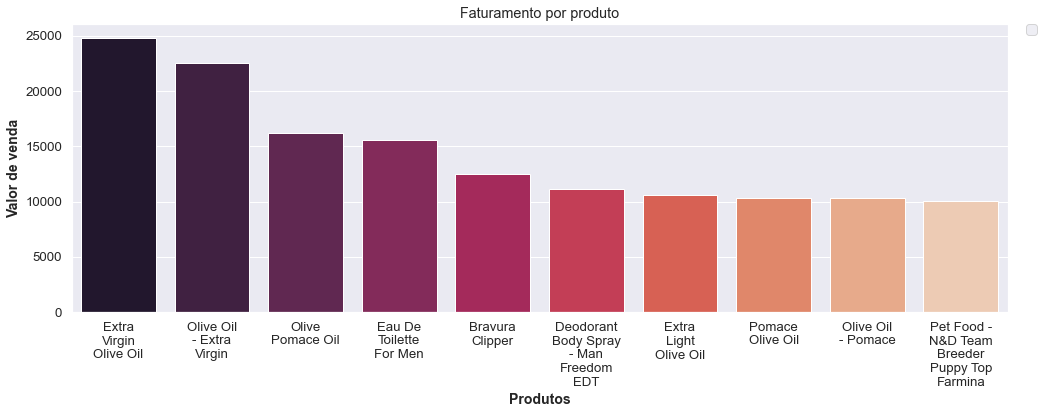

In [107]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_axes([0,0,1,1])
sns.barplot(data = prod, x = 'product', y = 'sales value', palette='rocket')
plt.title('Faturamento por produto')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("Produtos",fontsize=14, weight='semibold')
ax.set_ylabel("Valor de venda",fontsize=14, weight='semibold')
wrap_labels(ax, 10)

Avaliação do Rating médio por categoria (avaliação dos clientes)

In [64]:
# média Rating por categoria
Avg_Rating = df[['category','rating']].groupby(['category']).mean().reset_index().sort_values('rating', ascending = False)
Avg_Rating

,category,rating
3,Beverages,4.084858
6,"Foodgrains, Oil & Masala",4.062198
0,Baby Care,4.023790
8,Gourmet & World Food,3.984410
10,Snacks & Branded Foods,3.983313
4,Cleaning & Household,3.956667
2,Beauty & Hygiene,3.930655
1,"Bakery, Cakes & Dairy",3.911128
9,"Kitchen, Garden & Pets",3.734715
5,"Eggs, Meat & Fish",NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


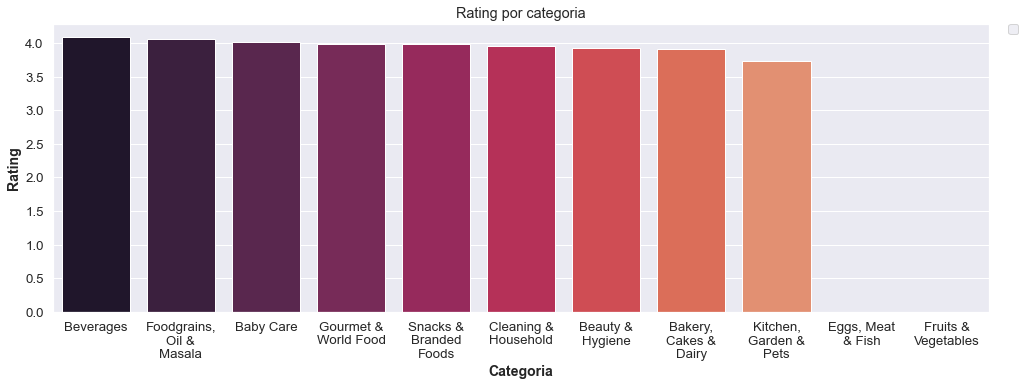

In [71]:
fig = plt.figure(figsize=(13,4))
ax = fig.add_axes([0,0,1,1])
sns.barplot(data = Avg_Rating, x = 'category', y = 'rating', palette='rocket')
plt.title('Rating por categoria')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("Categoria",fontsize=14, weight='semibold')
ax.set_ylabel("Rating",fontsize=14, weight='semibold')
wrap_labels(ax, 10)